#Machine Learning
##microchip fault prediction using a logistic regression model


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import plotData
import mapFeature as mF
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load Data
data = np.loadtxt(('ex2data2.txt'),delimiter=",");
X = data[:, 0:2]
y = data[:, 2:3].astype(int)

###We add more feature to be able to predict better on our test set .This is called feature mapping
###<font color='red'> Caution: Feature mapping may result to overfitting which is not favourible for machine learning</font>
###The implementation is in the file mapFeature.py

In [3]:
#mapping Features
X_map = mF.mapFeature(X[:,0], X[:,1]);

###dividing the data into test data

In [4]:
X_test=X_map[0:50,0:50]
y_test=y[0:50]

###Plotting the data


plotting the data points in our dataset. The + represent good microchips while the small dots represent the bad microchips


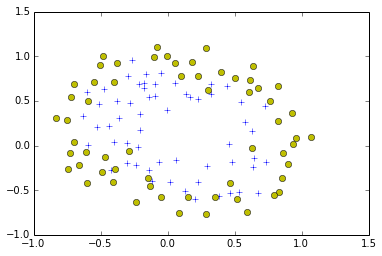

In [11]:
#plotting the data
plotData.plotData(X,y)
print 'plotting the data points in our dataset. The + represent good microchips while the small dots represent the bad microchips'

###obtaining the values of  $\theta$ 

In [6]:
# Create logistic regression object. We dont fit an intercept term since MapFeature already does that for us
logreg = linear_model.LogisticRegression( fit_intercept=False)

# Train the model using the training sets
logreg.fit(X_map,y.ravel())
# The coefficients
print 'Coefficients: \n', logreg.coef_  #values of theta

Coefficients: 
[[ 1.1421418   0.60133123  1.16720816 -1.87175318 -0.91573602 -1.26954353
   0.12666993 -0.36872263 -0.34519427 -0.1737859  -1.42387402 -0.04858047
  -0.60640851 -0.26932551 -1.16317987 -0.24308611 -0.20707255 -0.0432088
  -0.28027502 -0.28694562 -0.46911911 -1.03616566  0.02922704 -0.29262593
   0.01734536 -0.32896299 -0.13795013 -0.93199552]]


### obtaining the accuracy

In [7]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % logreg.score(X_map, y))

Variance score: 0.82


### plotting the decision boundary

plotting the decision boundary obtained by the logistic regression function


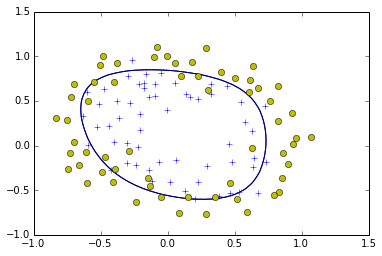

In [9]:
# Plot the decision boundary
# point in the mesh [x_min, m_max]x[y_min, y_max].

u =np.linspace(-1, 1.5, 50);
u=u.reshape(np.size(u),1);
v = np.linspace(-1, 1.5, 50);
v=v.reshape(np.size(v),1);

z = np.matrix(np.zeros((len(u), len(v)),dtype=float));
m,n=np.shape(logreg.coef_)
for i in range (len(u)):
 for j in range(len(v)):
     z[i,j]=np.dot(mF.mapFeature(u[i], v[j]),logreg.coef_.reshape(n,m))

#reshaping back to original way to enable the plotting
u =np.linspace(-1, 1.5, 50);
v =np.linspace(-1, 1.5, 50);
plotData.plotData(X,y)
#plotting a contour for the decision boundary z is transposed
plt.contour(u, v,np.transpose( z),(0,0),label="decision")
print 'plotting the decision boundary obtained by the logistic regression function'
plt.show()
